<a href="https://colab.research.google.com/github/fablihaanber/Titanic-dataset/blob/main/Titanic_survivors_Roll_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

##Data preparation


###Importing the titanic dataset csv files from github to google colab

In [ ]:
 
#Importing csv files from github to google colab
 
rawTrainDataUrl = 'https://raw.githubusercontent.com/fablihaanber/Titanic-dataset/main/train.csv'
rawTestDataUrl = 'https://raw.githubusercontent.com/fablihaanber/Titanic-dataset/main/test.csv'
#Converting the train and test dataset to dataframe
df_test = pd.read_csv(rawTestDataUrl)
df_train = pd.read_csv(rawTrainDataUrl)


##Data Analysis

###Checking data output

In [ ]:
#count number of rows and columns in the  test dataset
df_test.shape

(418, 11)

In [ ]:
#count number of rows and columns in the  train dataset WHICH IS SUBSET OF THE NUMBER OF PASSENGERS IN THE TITANIC
df_train.shape

(891, 12)

In [ ]:
#Showing the first few rows of test dataframe table
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Showing the first few rows of train dataframe table
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Pattern exploration and statistics

In [ ]:
#get some statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we can see some values are missing in count row of Age column. The null values be be filled later on.  

In [ ]:
#get some statistics of test dataset
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Here, we can see some values are missing in count row of Age column and Fare column. The null values be be filled later on.  

In [ ]:
#Count no.of survivors
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#checking the rate of people who survived by gender
df_train.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
female,0.742038
male,0.188908


##Data Visualization

###Count plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


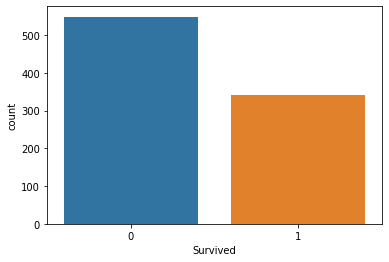

In [ ]:
#Visualizing number of survivors 
sns.countplot(df_train['Survived'])


###Sub Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

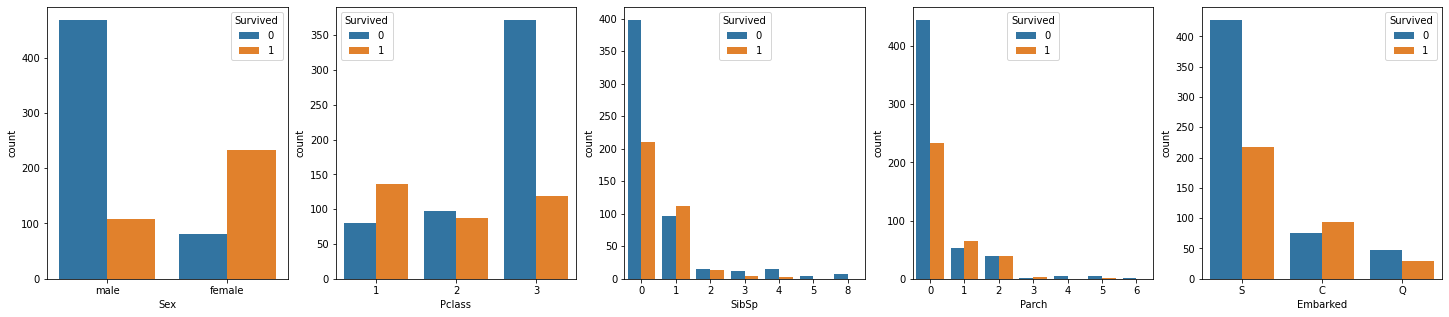

In [ ]:
#Visualizing number of survivors for columns 'Sex' , 'Pclass', 'SibSp', 'Parch', 'Embarked' using subplots


#plt.subplot(Total no. of rows,Total no. of columns,plot number)
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
sns.countplot('Sex', hue='Survived', data = df_train)

plt.subplot(1,5,2)
sns.countplot('Pclass', hue = 'Survived', data = df_train)

plt.subplot(1,5,3)
sns.countplot('SibSp', hue = 'Survived', data = df_train)

plt.subplot(1,5,4)
sns.countplot('Parch', hue = 'Survived', data = df_train)

plt.subplot(1,5,5)
sns.countplot('Embarked', hue = 'Survived', data = df_train)


###Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


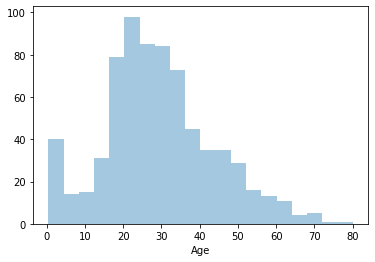

In [ ]:
#Plotting a histogram of age.
sns.distplot(df_train['Age'],kde = False)


This distribution plot shows that most of the people age ranges from 20-40

###Generating heat map to check null values

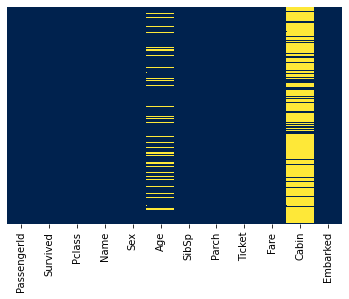

In [ ]:
#Using seaborn to generate heat map
sns.heatmap(df_train.isnull(),yticklabels=False, cbar = False, cmap = 'cividis')

From the heatmap, many values of age are missing and most values of cabin are missing. 

###Box plot

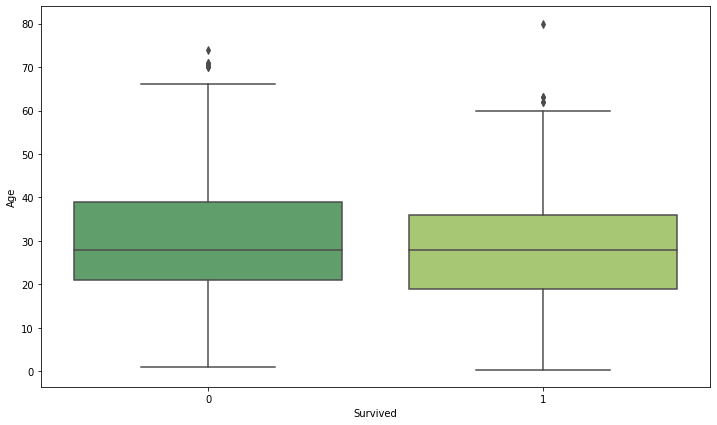

In [ ]:
#Box plot for the age according to survival

plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Survived', y = 'Age', data=df_train, palette='summer')

##Data cleaning

###Deleting unnecassary columns


In [ ]:
#Printing the number of columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#dropping columns from the train dataset - removing ticket, cabin , name, passengerid, Fare , embarked
	
df_train.drop(['PassengerId','Name', 'Ticket','Cabin','Fare','Embarked'], axis=1, inplace=True)
#Doing the same for test dataset
#Saving the passenger ID for storing in the output cvs file
df_test_passengerID = df_test['PassengerId'] 
df_test.drop(['Name', 'Ticket','Cabin','PassengerId','Fare','Embarked'], axis=1, inplace=True)


###Filling in the null values

Checking null values in the training data :

In [ ]:
#Calculating number of the nulls values  in the training data subset
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

So, the null values in *Embarked* and *Age* column are to be filled up





In [ ]:
#Checking the null values of test dataset
df_test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [ ]:
#Filling the null value of ages with the mean of age
df_train['Age'].fillna((df_train['Age'].mean()), inplace=True)

#Doing the same for test dataset
df_test['Age'].fillna((df_test['Age'].mean()), inplace=True)

In [ ]:
#Filling the null value of Fares with the mean of fares
#df_test['Fare'].fillna((df_test['Fare'].mean()), inplace=True)

###Some Feature Engineering

####Tranforming categorical data  to numeric data

In [ ]:
#Tranforming categorical data of sex column to numeric data
df_train['Sex'].replace(['female','male'],[5,1],inplace=True)

In [ ]:
#Doing the same for test dataset
df_test['Sex'].replace(['female','male'],[5,1],inplace=True)

##Logistic Regression model

###Train Test Split

At first, we will divide the training dataset into two parts- training data and testing data where the training dataset will be modeled and with the testing data, the model's accuracy is tested. Here 80% of the model is used for training and 20% of the model is used for testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

The min-max scaler will scale the range of features between 0 and 1 depending on the scale used and it will make the machine learning algorithm more efficient and read the data better

In [ ]:
x = df_train.drop('Survived',axis =1)
y = df_train['Survived']

#test_size = 0.2 will split the training datatset subset into 80% for training and 20% 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)





###Logistic regression Training and predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
model.fit(x,y)

LogisticRegression(max_iter=10000)

In [ ]:
model.predict(x_test)  #predicting the values of splitted test dataset of training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
model.score(x_test, y_test) #Calculating accuracy of the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.4245810055865922

In [ ]:
predictions = model.predict(df_test) 
output = pd.DataFrame({'PassengerId': df_test_passengerID, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
